## Readingrecords from the Database

In [44]:
import mysql.connector
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np

In [45]:
API_URL = "http://134.76.24.67/node" 

## Sessions

In [46]:
r = requests.get(API_URL+"/session")
print("Status:",r.status_code)
pd_data = []
sessions = json.loads(r.text)
for s in sessions:
    record = [s["session_id"], s["participant_id"], s["comment"]]
    pd_data.append(record)

print("Found", len(pd_data), "sessions")    
session_df = pd.DataFrame(pd_data, columns=['session_id', 'participant_id', 'comment'])
session_df.tail()


Status: 200
Found 389 sessions


session_id participant_id comment
384         385           null    None
385         386           null    None
386         387           null    None
387         388           null    None
388         389           null    None

## Trials

In [47]:
r = requests.get(API_URL+"/trial")
print("Status:",r.status_code)
pd_data = []
trials = json.loads(r.text)
for t in trials:
    #print(t)
    record = [t["trial_id"], t["session_id"],t["silhouette_id"], t["time_stamp"], t["reward"], t["timeout"], t["experiment_part"],t["trial_type"]]
    pd_data.append(record)
print("Found", len(pd_data), "trials")    
trial_df = pd.DataFrame(pd_data, columns=['trial_id','session_id','silhouette_id', 'time_stamp', 'reward', 'timeout','experiment_part', 'trial_type'])
trial_df.tail()

Status: 200
Found 4865 trials


trial_id  session_id  silhouette_id     time_stamp  reward  timeout  \
4860      4861         389            4.0  1639057108399       0      0.0   
4861      4862         389            5.0  1639057116844       0      1.0   
4862      4863         389            6.0  1639057137909       0      0.0   
4863      4864         389            7.0  1639057144036       1      0.0   
4864      4865         389            8.0  1639057151645       0      NaN   

      experiment_part  trial_type  
4860              0.0         1.0  
4861              0.0         2.0  
4862              0.0         2.0  
4863              0.0         0.0  
4864              0.0         1.0

## Actions

In [48]:
r = requests.get(API_URL+"/action")
print("Status:", r.status_code)
pd_data = []
actions = json.loads(r.text)
for a in actions:
    if a["building_block"] in [str(i) for i in range(9)]:
        record = [a["action_id"], a["trial"], int(a["building_block"]), a["reaction_time"], a["selected"]==1]
        pd_data.append(record)
print("Found", len(pd_data), "actions")
    
action_df = pd.DataFrame(pd_data, columns=['action_id', 'trial_id', 'building_block', 'reaction_time', 'selected'])
action_df.head()

Status: 200
Found 5817 actions


action_id  trial_id  building_block  reaction_time  selected
0          1         1               5          6.077      True
1          2         1               4          1.425      True
2          3         1               6          1.081      True
3          4         1               3          0.680      True
4          5         3               4          5.079      True

## Silhouettes

In [49]:
r = requests.get(API_URL+"/silhouette")
print("Status:", r.status_code)
pd_data = []
silhouettes = json.loads(r.text)
for s in silhouettes:
    record = [s["silhouette_id"], s["solution"], s["trial_type"]]
    pd_data.append(record)
print("Found", len(pd_data), "silhouettes")
    
silhouette_df = pd.DataFrame(pd_data, columns=["silhouette_id","solution","trial_type"])
silhouette_df.head()

Status: 200
Found 210 silhouettes


silhouette_id                                           solution  \
0              0  [{"x":2, "y":5, "id":0},{"x":4, "y":5, "id":1}...   
1              1  [{"x":2, "y":5, "id":0},{"x":4, "y":5, "id":1}...   
2              2  [{"x":4, "y":6, "id":2},{"x":4, "y":3, "id":3}...   
3              3  [{"x":3, "y":4, "id":0},{"x":4, "y":2, "id":2}...   
4              4  [{"x":7, "y":3, "id":2},{"x":1, "y":3, "id":3}...   

   trial_type  
0           0  
1           0  
2           2  
3           2  
4           1

In [50]:
### BUGFIX TRIAL TYPES ### 
# trial_types = np.array(silhouette_df["trial_type"])
# np.save("old_trial_types.npy",trial_types)
old_trial_types = np.load("old_trial_types.npy")

## Debriefing

In [51]:
## Debriefing tasks
r = requests.get(API_URL+"/debriefing")
print("Status:", r.status_code)
left = []
right = []
debr_tasks = json.loads(r.text)

for d in debr_tasks["left"]:
    record = [d["debriefing_id"], d["solution"]]
    left.append(record)

for d in debr_tasks["right"]:
    record = [d["debriefing_id"], d["solution"]]
    right.append(record)
    
    
print("Found", len(left), "debriefing tasks left")
print("Found", len(right), "debriefing tasks right")

debr_tasks_left_df = pd.DataFrame(left, columns=["debriefing_id","solution"])
print(debr_tasks_left_df.head())

debr_tasks_right_df = pd.DataFrame(right, columns=["debriefing_id","solution"])
print(debr_tasks_right_df.head())

Status: 200
Found 60 debriefing tasks left
Found 60 debriefing tasks right
   debriefing_id                                           solution
0              0    [{"x":4, "y":3, "id":1},{"x":4, "y":4, "id":2}]
1              1  [{"x":6, "y":3, "id":2},{"x":2, "y":3, "id":3}...
2              2    [{"x":3, "y":3, "id":3},{"x":5, "y":3, "id":5}]
3              3    [{"x":3, "y":4, "id":0},{"x":5, "y":4, "id":1}]
4              4    [{"x":4, "y":5, "id":1},{"x":5, "y":3, "id":2}]
   debriefing_id                                           solution
0              0    [{"x":4, "y":4, "id":2},{"x":5, "y":3, "id":5}]
1              1  [{"x":4, "y":4, "id":0},{"x":6, "y":4, "id":1}...
2              2    [{"x":3, "y":4, "id":0},{"x":5, "y":4, "id":1}]
3              3    [{"x":5, "y":4, "id":1},{"x":3, "y":3, "id":3}]
4              4    [{"x":3, "y":4, "id":1},{"x":6, "y":4, "id":2}]


In [52]:
# debriefing actions
r = requests.get(API_URL+"/debriefing_action")
print("Status:", r.status_code)
pd_data = []
debr_actions = json.loads(r.text)
for d in debr_actions:
    record = [d["debriefing_action_id"], d["session"], d["debriefing_id"],d["choice"], d["reaction_time"]] 
    pd_data.append(record)
    
print("Found", len(pd_data), "debriefing_actions")
    
debr_action_df = pd.DataFrame(pd_data, columns=["debriefing_action_id","session","debriefing_id","choice","reaction_time"])
debr_action_df.head()

Status: 200
Found 570 debriefing_actions


debriefing_action_id  session  debriefing_id choice  reaction_time
0                     1      175              0  right         19.264
1                     2      175              1   left          0.843
2                     3      175              2  right          0.792
3                     4      175              3  right          0.445
4                     5      175              4   left          0.481

<br><br><br><br><br><br><br><br><br><br>

## Statistics

### 1 Number of correct trials 

In [53]:
total_trials = 0 
total_correct = 0
for session in session_df["session_id"]:
    trials = trial_df[trial_df['session_id'] == session]
    num_correct = trials['reward'].sum()
    print(session,"\t", len(trials),"\t", num_correct)
    total_trials += len(trials)
    total_correct += num_correct

1 	 2 	 0
2 	 23 	 1
3 	 2 	 0
4 	 3 	 0
5 	 6 	 0
6 	 3 	 0
7 	 1 	 0
8 	 1 	 0
9 	 1 	 0
10 	 19 	 15
11 	 0 	 0
12 	 3 	 0
13 	 3 	 0
14 	 5 	 4
15 	 0 	 0
16 	 0 	 0
17 	 227 	 178
18 	 0 	 0
19 	 3 	 1
20 	 0 	 0
21 	 0 	 0
22 	 0 	 0
23 	 0 	 0
24 	 0 	 0
25 	 0 	 0
26 	 1 	 0
27 	 1 	 0
28 	 6 	 2
29 	 6 	 0
30 	 1 	 0
31 	 0 	 0
32 	 0 	 0
33 	 3 	 0
34 	 7 	 0
35 	 0 	 0
36 	 1 	 0
37 	 0 	 0
38 	 0 	 0
39 	 0 	 0
40 	 6 	 0
41 	 1 	 0
42 	 3 	 0
43 	 7 	 0
44 	 5 	 0
45 	 48 	 4
46 	 2 	 0
47 	 7 	 0
48 	 0 	 0
49 	 6 	 0
50 	 6 	 0
51 	 2 	 0
52 	 2 	 0
53 	 15 	 0
54 	 1 	 0
55 	 29 	 0
56 	 16 	 0
57 	 31 	 0
58 	 1 	 0
59 	 1 	 0
60 	 18 	 0
61 	 10 	 0
62 	 2 	 0
63 	 0 	 0
64 	 17 	 0
65 	 25 	 0
66 	 3 	 0
67 	 17 	 0
68 	 2 	 0
69 	 2 	 0
70 	 2 	 0
71 	 2 	 0
72 	 2 	 0
73 	 4 	 0
74 	 4 	 0
75 	 50 	 0
76 	 210 	 1
77 	 2 	 0
78 	 2 	 0
79 	 2 	 0
80 	 2 	 0
81 	 0 	 0
82 	 0 	 0
83 	 2 	 0
84 	 2 	 0
85 	 2 	 0
86 	 0 	 0
87 	 2 	 0
88 	 2 	 0
89 	 0 	 0
90 	 2 	 0

In [54]:
print("Accuracy: ", round(total_correct / total_trials * 100,2), "%")

Accuracy:  23.25 %


### 2 Performance over time 

In [55]:
# BUGFIX 
session_with_trialtype = 389


Session  225
Number of trials:  209
Accuracy:  72.25 %
Trial Type:  0 Accuracy:  75.71 %
Trial Type:  1 Accuracy:  71.01 %
Trial Type:  2 Accuracy:  70.0 %

Session  227
Number of trials:  210
Accuracy:  85.24 %
Trial Type:  0 Accuracy:  90.0 %
Trial Type:  1 Accuracy:  82.86 %
Trial Type:  2 Accuracy:  82.86 %

Session  262
Number of trials:  210
Accuracy:  82.86 %
Trial Type:  0 Accuracy:  90.0 %
Trial Type:  1 Accuracy:  80.0 %
Trial Type:  2 Accuracy:  78.57 %

Session  265
Number of trials:  210
Accuracy:  51.9 %
Trial Type:  0 Accuracy:  74.29 %
Trial Type:  1 Accuracy:  41.43 %
Trial Type:  2 Accuracy:  40.0 %


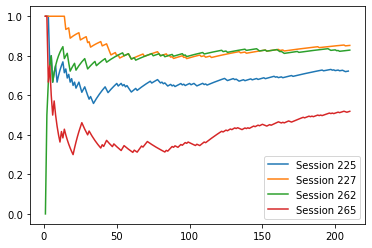

In [56]:
ids = [225,227, 262,265]
trial_types = list(range(3))
trial_type_accuracy = {}

for session_id in ids: 
    print("\nSession ", session_id)
    trials = trial_df[trial_df['session_id'] == session_id]
    print("Number of trials: ", len(trials))
    accuracy = []
    trial_count = 0
    correct_count = 0

    for r in trials["reward"]:
        trial_count += 1
        correct_count += r
        accuracy.append(correct_count/trial_count)


    plt.plot(range(1,len(trials)+1), accuracy, label="Session "+str(session_id))
    print("Accuracy: ", round(accuracy[-1]*100,2), "%")
    
    for tt in trial_types:
        
        if session_id < session_with_trialtype:
            #TRIAL TYPE NOT AVALABLE IN TRIAL DATA!
            trials_tt = trials[trials["silhouette_id"].isin(np.argwhere(old_trial_types==tt).flatten())]
        else:
            trials_tt = trials[trials["trial_type"]]
        
        
        accuracy = trials_tt["reward"].sum()/len(trials_tt)
        print("Trial Type: ", tt, "Accuracy: ", round(accuracy*100,2), "%")
    
    
plt.legend()
plt.show()

### 3 Reaction Time over time 


Session  225
Mean reaction time:  9.86 Seconds


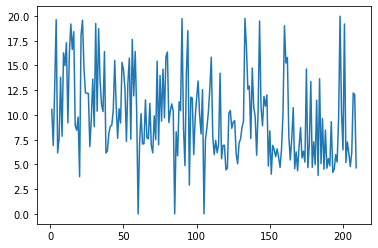


Session  227
Mean reaction time:  9.52 Seconds


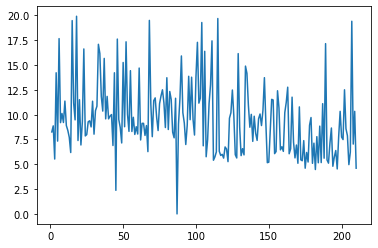


Session  262
Mean reaction time:  9.06 Seconds


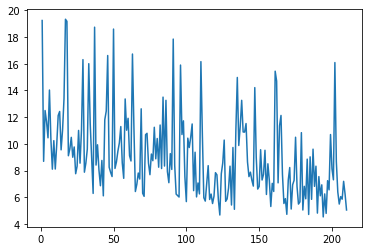

In [11]:
ids = [225,227, 262]
for session_id in ids:
    print("\nSession ", session_id)
    trials = trial_df[trial_df['session_id'] == session_id]
    reaction_time = []

    for trial_id in trials["trial_id"]:
        actions = action_df[action_df["trial_id"] == trial_id]
        reaction_time.append(actions["reaction_time"].sum())
    
    print("Mean reaction time: ", round(np.mean(reaction_time),2), "Seconds")
    plt.plot(range(1,len(trials)+1), reaction_time)
    plt.show()

## 4 Debriefing


Session  225
Left:  16
Right:  14
Mean reaction time:  21.25 Seconds


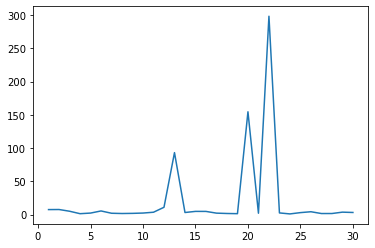


Session  227
Left:  16
Right:  14
Mean reaction time:  7.58 Seconds


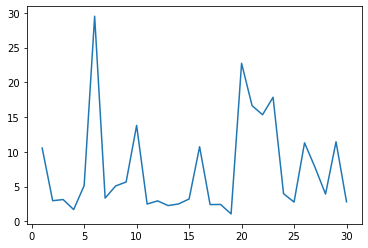


Session  262
Left:  13
Right:  17
Mean reaction time:  2.88 Seconds


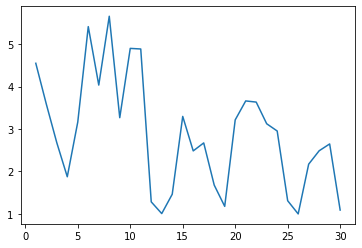

In [12]:
ids = [225,227, 262]
for session_id in ids:
    print("\nSession ", session_id)
    dbr = debr_action_df[debr_action_df["session"] == session_id]
    left = dbr[dbr["choice"] == "left"]
    right = dbr[dbr["choice"] == "right"]
    
    print("Left: ", len(left))
    print("Right: ", len(right))
    
    reaction_time = dbr["reaction_time"]
    
    print("Mean reaction time: ", round(np.mean(reaction_time),2), "Seconds")
    plt.plot(range(1,len(dbr)+1), reaction_time)
    plt.show()

## 5 Comments:

In [13]:
ids = [225,227, 262]
for session_id in ids:
    print("\nSession ", session_id)
    print(session_df.iloc[session_id-1]['comment'])


Session  225
nice set up! graphics are very good - sometimes slow to lag. very long experiment and found it hard! as i guess is the point. took around 50 minutes. I found the difficulty was that it seemed like there were some non-unique decompositions that got penalised if you got the wrong thing. 

Session  227
Did some of them have multiple answers? I felt I got red screens for some correct solutions (not 100% sure they were correct though)

Session  262



## 6 Payment:

In [17]:
prolific_sessions = session_df[~session_df["participant_id"].isin([None, "null", "1337"])]
num_trials = 210
bonus_per_correct = 0.02

for index, session in prolific_sessions.iterrows():
    trials = trial_df[trial_df["session_id"] == session["session_id"]]
    if len(trials) == 210: 
        bonus = trials["reward"].sum() * bonus_per_correct
        print(session["participant_id"], bonus)
    

597fab7b039d690001aa887c 3.48
